## Amazon Data Science Book Reviews

### Exploratory Data Analysis

In [2]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_roc_curve
#import scikitplot as skplt


from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
# Read the dataset
data = pd.read_csv("/content/drive/MyDrive/Amazon Books Reviews Dataset/reviews.csv")

In [8]:
#Lets have a look at dataset
data.head()

,stars,comment,book_url
0,5.0,"Let me say at the outset of this review, that ...",https://www.amazon.com/dp/1492041130
1,1.0,Its Capitalism at its best. I read the book fr...,https://www.amazon.com/dp/1492041130
2,5.0,If you're looking to get started with data sci...,https://www.amazon.com/dp/1492041130
3,4.0,"In general, this is a good book. It covers a w...",https://www.amazon.com/dp/1492041130
4,5.0,I was an academic data scientist decades befor...,https://www.amazon.com/dp/1492041130


In [9]:
data.shape

(20647, 3)

In [10]:
# Lets remove book_url column as we dont need it for analysis of reviews
data.drop(['book_url'],axis=1, inplace=True)

In [11]:
data.head()

,stars,comment
0,5.0,"Let me say at the outset of this review, that ..."
1,1.0,Its Capitalism at its best. I read the book fr...
2,5.0,If you're looking to get started with data sci...
3,4.0,"In general, this is a good book. It covers a w..."
4,5.0,I was an academic data scientist decades befor...


In [12]:
# Check for null values
data.isnull().sum()

stars      0
comment    0
dtype: int64

###### Null values are not present in data

In [13]:
# Check for duplicates
data[data.duplicated()]

,stars,comment
191,5.0,Good
395,5.0,good
594,5.0,good
757,5.0,I bought this book for understanding the term ...
786,5.0,very good
...,...,...
20544,5.0,Very helpful
20545,5.0,Great product
20551,5.0,Good read
20632,5.0,very good


###### There are 1026 duplicate reviews/comments

In [14]:
# Lets remove duplicates
# Drop duplicates and keep the first occurence of the review
data.drop_duplicates(keep='first', inplace=True)

In [15]:
data.shape

(19621, 2)

In [16]:
# Lets create a new feature sentiment based on stars
sentiments = []
for star in data['stars'].tolist():
  if star > 3.0:
    sentiments.append(1)
  else:
    sentiments.append(0)
data['sentiment'] = sentiments

<Axes: xlabel='sentiment', ylabel='count'>

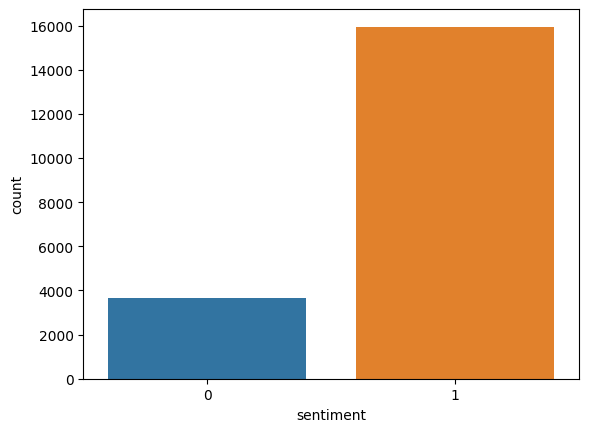

In [17]:
# Lets check number of values for each category of stars
sns.countplot(x=data["sentiment"])

### Text Pre-processing

In [18]:
# Lets do pre-processing on comments
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
def preprocess_comment(comment):
    comment = re.sub('[^a-zA-Z]',' ', comment)
    comment = comment.lower()
    comment = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(comment) if word not in set(stopwords.words('english'))]
    clean_comment = ' '.join(comment)
    return clean_comment
   

In [19]:
# Comment before preprocessing
data['comment'].iloc[2]

"If you're looking to get started with data science but you're confused on which material to use...videos, books, a specific online class, etc...start with this book and see where it takes you. This book will give you a great place to start and afterwards, you will have enough knowledge to make an educated choice on what educational resource to use next."

In [20]:
# Comment after preprocessing
preprocess_comment(data['comment'].iloc[2])

'looking get started data science confused material use video book specific online class etc start book see take book give great place start afterwards enough knowledge make educated choice educational resource use next'

### Split Data into training and testing data

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['comment'], data['sentiment'], stratify =  data['sentiment'], test_size= 0.2, random_state=42)

In [ ]:
x_train.shape

(15696,)

In [ ]:
x_test.shape

(3925,)

In [ ]:
y_train.value_counts()

1    12760
0     2936
Name: sentiment, dtype: int64

### Text Vectorization Using TF-IDF

In [ ]:
# Creating vectors for train and test data using tf-idf with the custom tokenizer that we defined earlier
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(tokenizer = preprocess_comment, max_features=10000,ngram_range=(1, 3),max_df=0.7)
X_train = cv.fit_transform(x_train)
X_test = cv.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
y_train.value_counts()

1    12760
0     2936
Name: sentiment, dtype: int64

In [ ]:
y_test.value_counts()

1    3191
0     734
Name: sentiment, dtype: int64

In [ ]:
X_train.shape

(15696, 8784)

In [ ]:
X_test.shape

(3925, 8784)

### Using SMOTE to handle class imbalance in training data

In [25]:
# Using SMOTE to increase the number of samples in minority class.
# Sampling_strategy = 0.75 corresponds to the desired ratio of the number of samples in the minority class 
# over the number of samples in the majority class after resampling

over = SMOTE(sampling_strategy=0.5)
#under = RandomUnderSampler(sampling_strategy=0.6)
#steps = [('over', over), ('under', under)]
#pipeline = Pipeline(steps=steps)

# transform the dataset
X_train, y_train = over.fit_resample(X_train, y_train)

In [26]:
X_train.shape

(19140, 8784)

In [27]:
y_train.value_counts()

1    12760
0     6380
Name: sentiment, dtype: int64

In [31]:
under = RandomUnderSampler(sampling_strategy=0.6)
X_train, y_train = under.fit_resample(X_train, y_train)

In [32]:
y_train.value_counts()

1    10633
0     6380
Name: sentiment, dtype: int64

### Defining some utility functions

In [33]:
def evaluate_models(X_train, y_train,X_test,y_test,model,param):
  gs = GridSearchCV(model,param,cv=3)
  gs.fit(X_train.toarray(),y_train)

  model.set_params(**gs.best_params_)
  model.fit(X_train.toarray(),y_train)
  y_train_pred = model.predict(X_train.toarray())
  y_train_pred_prob = model.predict_proba(X_train.toarray())
  y_test_pred = model.predict(X_test.toarray())
  y_test_pred_proba = model.predict_proba(X_test.toarray())

  return model,y_train_pred, y_train_pred_prob, y_test_pred, y_test_pred_proba

In [107]:
f1_score_tfidf_train = {}
f1_score_tfidf_test = {}

tpr_tfidf_test = {}
fpr_tfidf_test = {}
auc_tfidf = {}

In [51]:
from sklearn import metrics
def plot_confusion_matrix(y_actual, y_pred):
  confusion_matrix = metrics.confusion_matrix(y_actual, y_pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['negative', 'positive'])
  cm_display.plot()
  plt.show()



In [108]:
from mlxtend.plotting import plot_confusion_matrix
def model_perf_plots(y_true,y_pred, fpr,tpr, auc):
  f, axes = plt.subplots(1, 2, figsize=(10, 5))
  #plt.subplot(1,2,1)
  axes[0].set_title('Confusion Matrix')
  confusion_matrix = metrics.confusion_matrix(y_true,y_pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['negative', 'positive'])
  cm_display.plot(ax=axes[0])
  cm_display.ax_.set_xlabel('Predictions', fontsize=9)
  cm_display.ax_.set_ylabel('Actuals', fontsize=9)
  #plt.title('Confusion Matrix', fontsize=18)
  

  #plt.subplot(1,2,2)
  axes[1].set_title('ROC Curve')
  #create ROC curve
  axes[1].plot(fpr,tpr,label="AUC="+str(auc))
  axes[1].set_ylabel('True Positive Rate')
  axes[1].set_xlabel('False Positive Rate')
  axes[1].legend(loc=4)

  plt.subplots_adjust(wspace=0.50, hspace=0.1)
  plt.show()





### Guassian Naive Bayes

F1 score of model GaussianNB(var_smoothing=0.01) on training data is 0.779787345622224
F1 score of model GaussianNB(var_smoothing=0.01) on test data is 0.7022184599973449


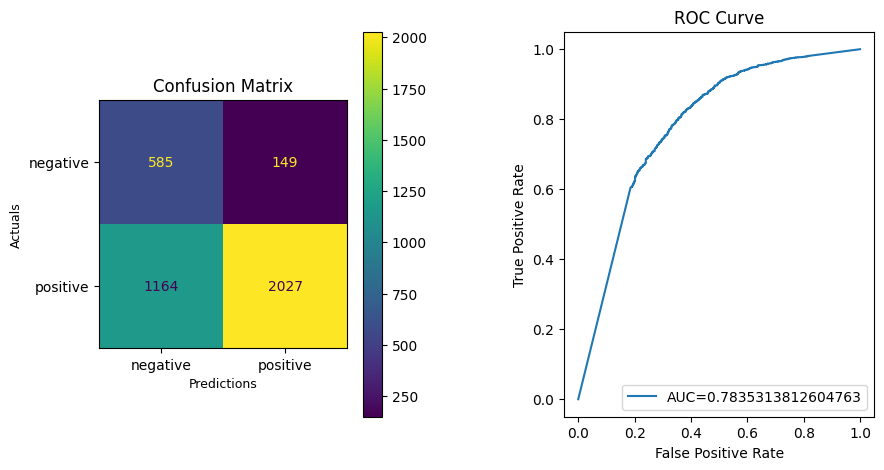

In [109]:
model  = GaussianNB()
param = { 'var_smoothing': [0.001,0.01,0.05,0.1,0.5,1]}

model , y_train_pred,y_train_pred_proba, y_test_pred, y_test_pred_proba = evaluate_models(X_train, y_train,X_test,y_test,model,param)
fpr,tpr,_ = roc_curve(y_test, y_test_pred_proba[:,1])
auc = roc_auc_score(y_test, y_test_pred_proba[:,1])

f1_score_tfidf_train[model] =  f1_score(y_train, y_train_pred, average='weighted')
print("F1 score of model {} on training data is {}".format(model, f1_score_tfidf_train[model]))

f1_score_tfidf_test[model] =  f1_score(y_test, y_test_pred, average='weighted')
print("F1 score of model {} on test data is {}".format(model, f1_score_tfidf_test[model]))

tpr_tfidf_test[model] = tpr
fpr_tfidf_test[model] = fpr
auc_tfidf[model] = auc


model_perf_plots(y_test,y_test_pred, fpr,tpr, auc)
#plot_confusion_matrix(y_test, y_test_pred)
#plt.plot(fpr, tpr)
#plt.show()


### Decision Tree

F1 score of model DecisionTreeClassifier(class_weight='balanced', max_depth=75,
                       min_samples_leaf=5) on training data is 0.9329701479674387
F1 score of model DecisionTreeClassifier(class_weight='balanced', max_depth=75,
                       min_samples_leaf=5) on test data is 0.7261929547096775


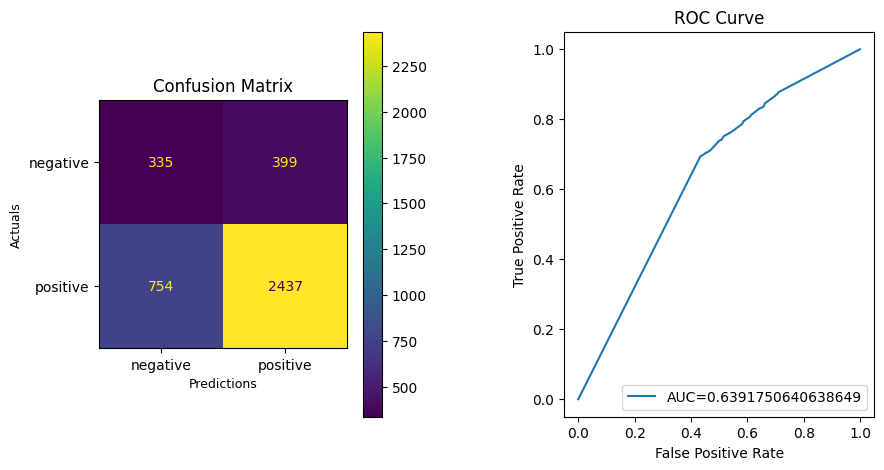

In [111]:
model  = DecisionTreeClassifier(class_weight = "balanced")
param = { 'max_depth' : [10,20,50,75],
           'min_samples_leaf' : [5,10,15,20]}

model , y_train_pred,y_train_pred_proba, y_test_pred, y_test_pred_proba = evaluate_models(X_train, y_train,X_test,y_test,model,param)
fpr,tpr,_ = roc_curve(y_test, y_test_pred_proba[:,1])
auc = roc_auc_score(y_test, y_test_pred_proba[:,1])

f1_score_tfidf_train[model] =  f1_score(y_train, y_train_pred, average='weighted')
print("F1 score of model {} on training data is {}".format(model, f1_score_tfidf_train[model]))

f1_score_tfidf_test[model] =  f1_score(y_test, y_test_pred, average='weighted')
print("F1 score of model {} on test data is {}".format(model, f1_score_tfidf_test[model]))


tpr_tfidf_test[model] = tpr
fpr_tfidf_test[model] = fpr
auc_tfidf[model] = auc


model_perf_plots(y_test,y_test_pred, fpr,tpr, auc)

### Random Forest Classifier

F1 score of model RandomForestClassifier(class_weight='balanced_subsample', max_depth=75,
                       max_samples=0.5) on training data is 0.9935235235059063
F1 score of model RandomForestClassifier(class_weight='balanced_subsample', max_depth=75,
                       max_samples=0.5) on test data is 0.7848712494934443


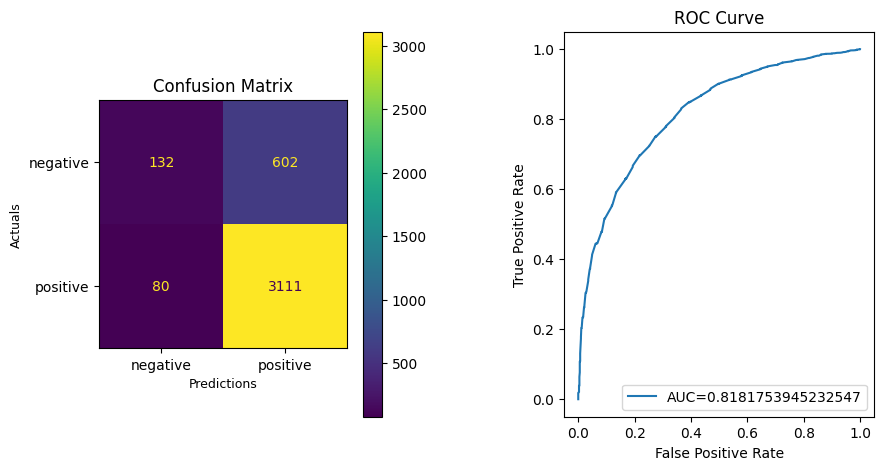

In [115]:
model  = RandomForestClassifier(class_weight='balanced_subsample')
param = { 'n_estimators': [30,50,75,100], 'max_depth' :[ 10,20,25,75], 'max_samples' : [0.2,0.3,0.5]}

model , y_train_pred,y_train_pred_proba, y_test_pred, y_test_pred_proba = evaluate_models(X_train, y_train,X_test,y_test,model,param)
fpr,tpr,_ = roc_curve(y_test, y_test_pred_proba[:,1])
auc = roc_auc_score(y_test, y_test_pred_proba[:,1])

f1_score_tfidf_train[model] =  f1_score(y_train, y_train_pred, average='weighted')
print("F1 score of model {} on training data is {}".format(model, f1_score_tfidf_train[model]))

f1_score_tfidf_test[model] =  f1_score(y_test, y_test_pred, average='weighted')
print("F1 score of model {} on test data is {}".format(model, f1_score_tfidf_test[model]))


tpr_tfidf_test[model] = tpr
fpr_tfidf_test[model] = fpr
auc_tfidf[model] = auc


model_perf_plots(y_test,y_test_pred, fpr,tpr, auc)

F1 score of model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) on training data is 0.7385844770861117
F1 score of model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stoppin

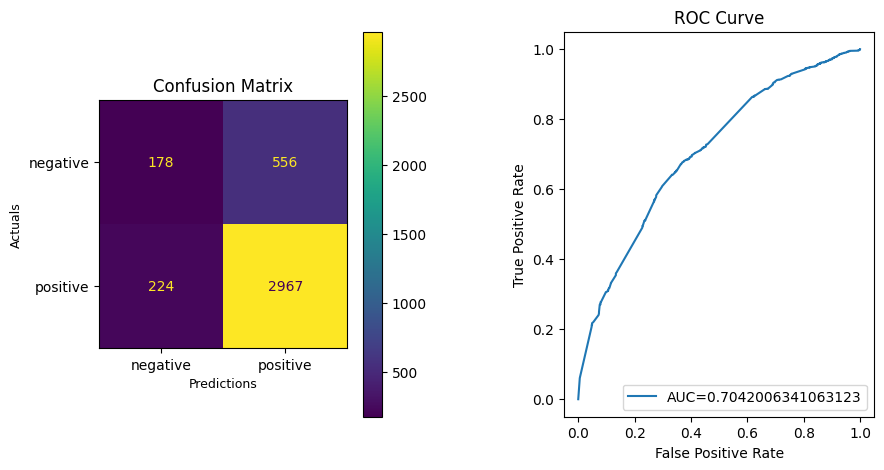

In [117]:
import xgboost as xgb
model  = xgb.XGBClassifier()
param = { 'n_estimators': [100], 'learning_rate':[0.001]}

model , y_train_pred,y_train_pred_proba, y_test_pred, y_test_pred_proba = evaluate_models(X_train, y_train,X_test,y_test,model,param)
fpr,tpr,_ = roc_curve(y_test, y_test_pred_proba[:,1])
auc = roc_auc_score(y_test, y_test_pred_proba[:,1])

f1_score_tfidf_train[model] =  f1_score(y_train, y_train_pred, average='weighted')
print("F1 score of model {} on training data is {}".format(model, f1_score_tfidf_train[model]))

f1_score_tfidf_test[model] =  f1_score(y_test, y_test_pred, average='weighted')
print("F1 score of model {} on test data is {}".format(model, f1_score_tfidf_test[model]))


tpr_tfidf_test[model] = tpr
fpr_tfidf_test[model] = fpr
auc_tfidf[model] = auc


model_perf_plots(y_test,y_test_pred, fpr,tpr, auc)


### Text Vectorization using Word2Vec